In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize']=(20,5)
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import pyarrow.parquet as pq

In [6]:
df=pd.read_parquet("d:/royal_omex.parquet")
df['Kwh'] = df['Kwh'] / 1000
df_name=pd.read_excel("D:/Data_Files/NPCL_NAMES.xlsx")

In [3]:
df1=df.groupby('sensor')

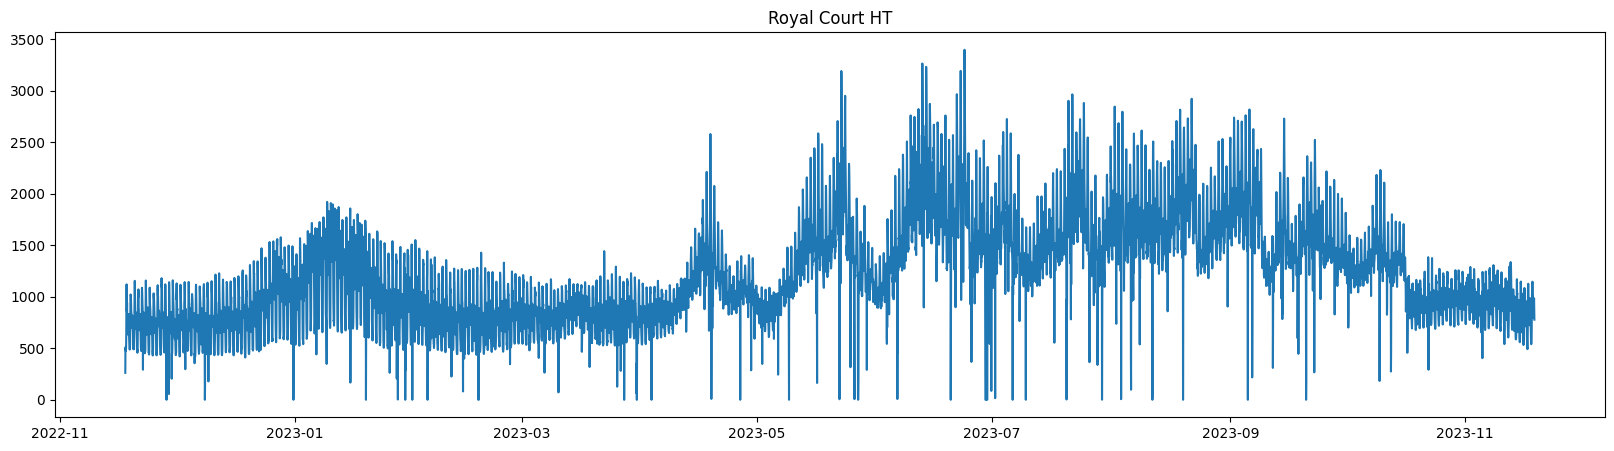

0 , zero count= 30 total count= 8784  Royal Court HT
data  is stationary with score 0.025810279242143856


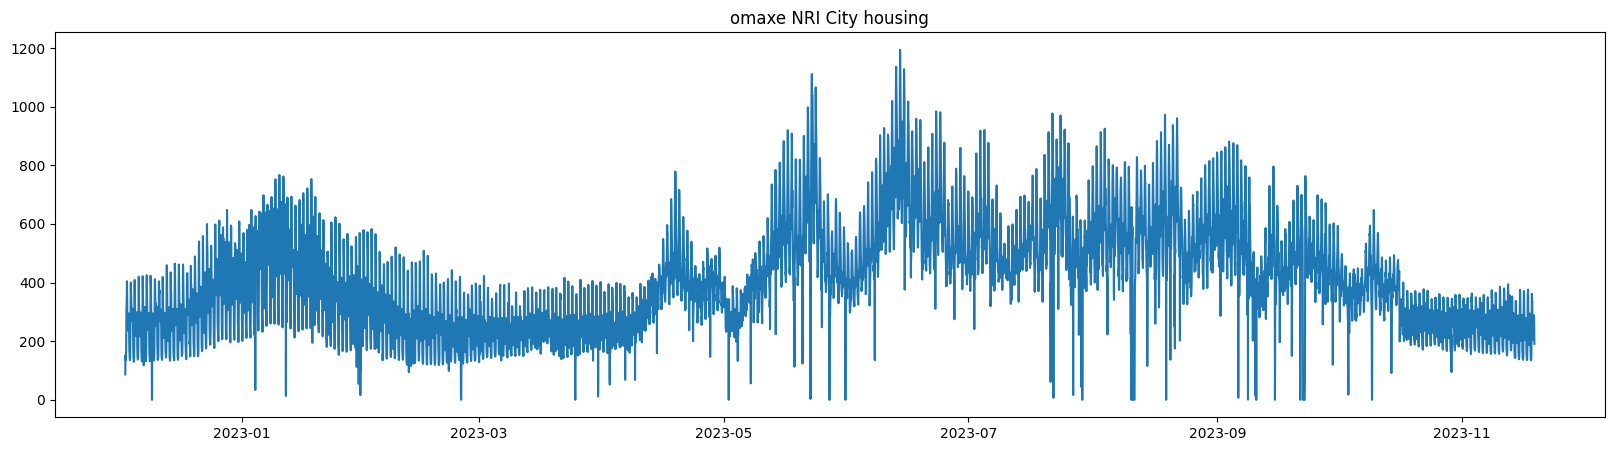

1 , zero count= 40 total count= 8424  omaxe NRI City housing
data  is stationary with score 0.009617865273081049


In [4]:
i=0
dct={}
for items , data in df1:
    sensor_df=data
    filtered_df = sensor_df[
                    ((sensor_df['R_Voltage'] == 0) | (sensor_df['Y_Voltage'] == 0) | (sensor_df['B_Voltage'] == 0)) & (
                            (sensor_df['R_Current'] == 0) | (
                            sensor_df['Y_Current'] == 0) | (sensor_df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0
    sensor_df['Clock'] = pd.to_datetime(sensor_df['Clock'])
    sensor_df.set_index(['Clock'], inplace=True, drop=True)
    sensor_df = sensor_df[sensor_df.index >= '2022-11-18 00:00:00']
    # print(df.head())
    dfresample = sensor_df[['Kwh']].resample(rule='1H').sum()
    # dfresample['Kwh'] = dfresample['Kwh'].rolling(window=24).mean()
    dfresample.dropna(inplace=True)     
#   """ adding name column """
    name_row = df_name[df_name['id'] == items]
    selected_name = name_row[['name']]
    dfresample['Name'] = selected_name['name'].iloc[0] if not selected_name.empty else None
#    """ done """
    df2=dfresample[(dfresample['Kwh']==0)]
    # print(len(df2))

    result=adfuller(dfresample['Kwh'],autolag='AIC')
    # if result[1]<0.05:
    #     plt.plot(sensor_df['Kwh'])
    #     plt.title((dfresample['Name'].iloc[0]))
    #     plt.show()
    #     print('data  is stationary with score', result[1])
    #     print(dfresample.tail(1))

    if result[1]<0.05:
            plt.plot(dfresample['Kwh'])
            plt.title((dfresample['Name'].iloc[0]))
            plt.show()
            print(i,", zero count=",len(df2),"total count=",len(dfresample),"",dfresample['Name'].iloc[0])
            print('data  is stationary with score', result[1])
            i+=1
    else:
        print()
        print('data is not stationary with score',result[1],",",dfresample['Name'].iloc[0])

    # sensor_df 



In [5]:
df2

,Kwh,Name
Clock,,
2022-12-09 16:00:00,0.0,omaxe NRI City housing
2023-02-24 16:00:00,0.0,omaxe NRI City housing
2023-03-25 02:00:00,0.0,omaxe NRI City housing
2023-05-27 08:00:00,0.0,omaxe NRI City housing
2023-05-27 09:00:00,0.0,omaxe NRI City housing
2023-05-27 10:00:00,0.0,omaxe NRI City housing
2023-05-31 09:00:00,0.0,omaxe NRI City housing
2023-07-29 08:00:00,0.0,omaxe NRI City housing
2023-07-29 09:00:00,0.0,omaxe NRI City housing


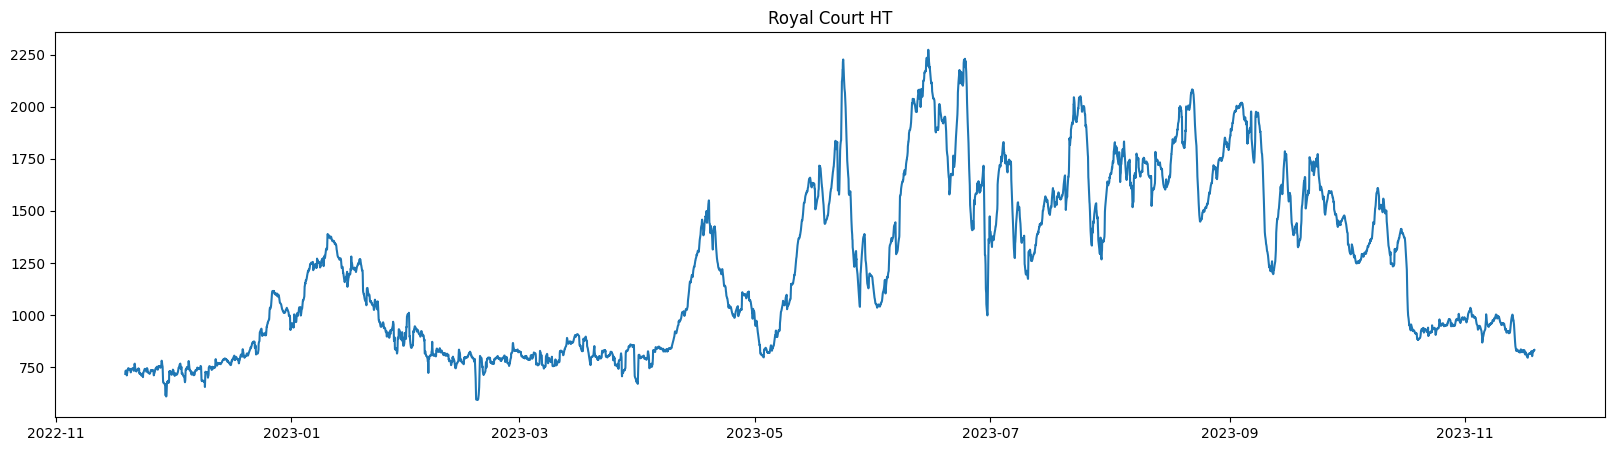

0 , zero count= 0 total count= 8761  Royal Court HT
data  is stationary with score 0.03153446534457222

data is not stationary with score 0.05563150247142837 , omaxe NRI City housing


In [11]:
i=0
dct={}
l1=[]

for items , data in df1:
    sensor_df=data
    
#   """Validation"
    filtered_df = sensor_df[(
                    (sensor_df['R_Voltage'] == 0) | (sensor_df['Y_Voltage'] == 0) |
                    (sensor_df['B_Voltage'] == 0)) & ((sensor_df['R_Current'] == 0) | 
                    (sensor_df['Y_Current'] == 0) | (sensor_df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0
#   """Validation done"

#   """date time conversion and time series making"
    sensor_df['Clock'] = pd.to_datetime(sensor_df['Clock'])
    sensor_df.set_index(['Clock'], inplace=True, drop=True)
    sensor_df = sensor_df[sensor_df.index >= '2022-11-18 00:00:00']
    # print(df.head())
#

#   """resampling"
    dfresample = sensor_df[['Kwh']].resample(rule='1H').sum()
#   """resampling done"

#   """rolling"
    dfresample['Kwh'] = dfresample['Kwh'].rolling(window=24).mean()
    dfresample.dropna(inplace=True)     
#   """rolling"

#   """ adding name column """
    name_row = df_name[df_name['id'] == items]
    selected_name = name_row[['name']]
    dfresample['Name'] = selected_name['name'].iloc[0] if not selected_name.empty else None
#    """ name done """

#   """outage handling"
    df2=dfresample[(dfresample['Kwh']==0)]
    # print(len(df2))
#   """"
    dfresample['sensor']=items
#   """stationary check"
    result=adfuller(dfresample['Kwh'],autolag='AIC')
    if result[1]<0.05:
            plt.plot(dfresample['Kwh'])
            plt.title((dfresample['Name'].iloc[0]))
            plt.show()
            print(i,", zero count=",len(df2),"total count=",len(dfresample),"",dfresample['Name'].iloc[0])
            print('data  is stationary with score', result[1])
            i+=1
    else:
        print()
        print('data is not stationary with score',result[1],",",dfresample['Name'].iloc[0])

    # sensor_df 



In [12]:
dfresample

,Kwh,Name,sensor
Clock,,,
2022-12-03 23:00:00,248.087500,omaxe NRI City housing,62a9920f75c931.62399458
2022-12-04 00:00:00,251.579167,omaxe NRI City housing,62a9920f75c931.62399458
2022-12-04 01:00:00,251.862500,omaxe NRI City housing,62a9920f75c931.62399458
2022-12-04 02:00:00,252.229167,omaxe NRI City housing,62a9920f75c931.62399458
2022-12-04 03:00:00,251.845833,omaxe NRI City housing,62a9920f75c931.62399458
...,...,...,...
2023-11-18 19:00:00,234.320833,omaxe NRI City housing,62a9920f75c931.62399458
2023-11-18 20:00:00,234.212500,omaxe NRI City housing,62a9920f75c931.62399458
2023-11-18 21:00:00,234.145833,omaxe NRI City housing,62a9920f75c931.62399458


In [13]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lst = [
        '62a9920f75c931.62399458',
        '5f718c439c7a78.65267835',
        '5f718b613291c7.03696209',
        '614366bce31a86.78825897',
        '6148740eea9db0.29702291',
        '62307a944c9117.27764752',
        '625fb44c5fb514.98107900',
        '625fb9e020ff31.33961816',
        '6260fd4351f892.69790282',
        '627cd4815f2381.31981050',
        '629087dedbd477.79790710',
        '629094ee5fdff4.43505210',
        '6295bdace55341.17149388',
        '6295eb61511b31.65607460',
        '62a9d0d7af97e3.16097779',
        '62aad7f5c65185.80723547',
        '62b15dfee341d1.73837476',
        '62b595eabd9df4.71374208',
        '6349368c306542.16235883',
        '634e7c43038801.39310596',
        '6399a18b1488b8.07706749',
        '63a413c88f4716.77874329',
        '63a4195534d625.00718490',
        '63a4272631f153.67811394',
        '63aa9161b9e7e1.16208626',
        '63aaca5d76b0e8.04988241',
        '63ca403ccd66f3.47133508',
        '641c17bc672215.97177522']


In [18]:
df=pd.DataFrame({"id":lst})
df

,id
0,62a9920f75c931.62399458
1,5f718c439c7a78.65267835
2,5f718b613291c7.03696209
3,614366bce31a86.78825897
4,6148740eea9db0.29702291
5,62307a944c9117.27764752
6,625fb44c5fb514.98107900
7,625fb9e020ff31.33961816
8,6260fd4351f892.69790282
9,627cd4815f2381.31981050


In [20]:
le = LabelEncoder()
df['keys']= le.fit_transform(df['id'])
df

,id,keys
0,62a9920f75c931.62399458,13
1,5f718c439c7a78.65267835,1
2,5f718b613291c7.03696209,0
3,614366bce31a86.78825897,2
4,6148740eea9db0.29702291,3
5,62307a944c9117.27764752,4
6,625fb44c5fb514.98107900,5
7,625fb9e020ff31.33961816,6
8,6260fd4351f892.69790282,7
9,627cd4815f2381.31981050,8
